In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if isinstance(skill_list, str) else skill_list)

In [ ]:
df_IN = df[df['job_country'] == 'India'].dropna(subset=['salary_year_avg']).copy()
job_titles = df_IN['job_title_short'].value_counts().index[:6].tolist()

df_IN_top6 = df_IN[df_IN['job_title_short'].isin(job_titles)].copy()
job_order = df_IN_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_title_short
Data Engineer                147500.0
Senior Data Engineer         147500.0
Data Scientist               114008.0
Data Analyst                 100500.0
Machine Learning Engineer     79200.0
Software Engineer             79200.0
Name: salary_year_avg, dtype: float64

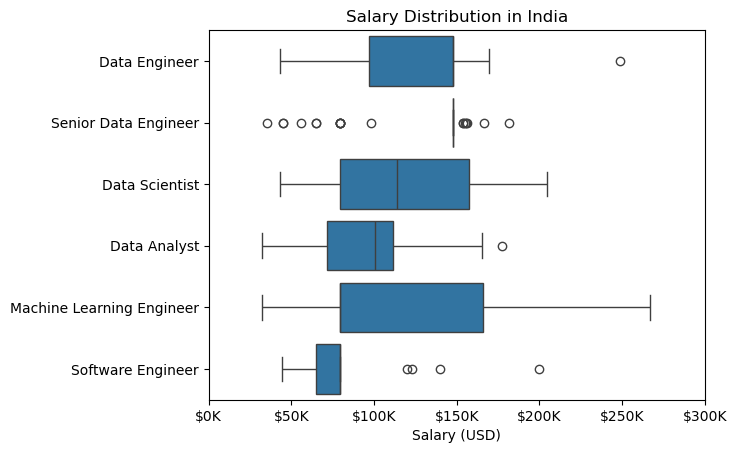

In [11]:
sns.boxplot(data=df_IN_top6, x='salary_year_avg', y='job_title_short', order=job_order)

plt.title('Salary Distribution in India')
plt.xlabel('Salary (USD)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 300000)
plt.show()

# Investigate Median Salary vs Skill for Data Analyst

In [13]:
df_DA_IN = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()
df_DA_IN = df_DA_IN.dropna(subset=['salary_year_avg'])
df_DA_IN = df_DA_IN.explode('job_skills')

In [28]:
df_top_pay = df_DA_IN.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False).head(10)
df_top_skills = df_DA_IN.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

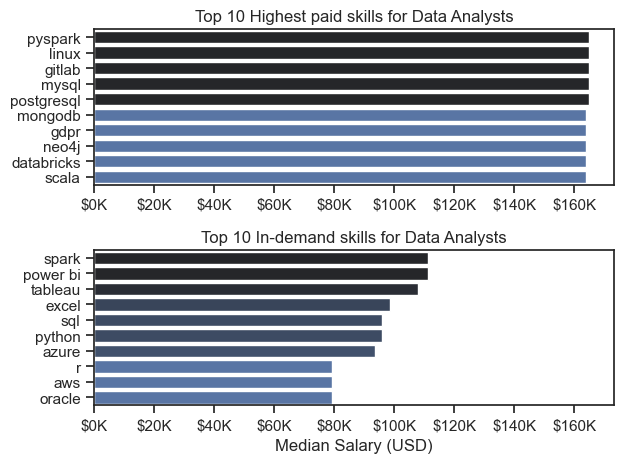

In [30]:
fig, ax = plt.subplots(2,1)

sns.set_theme(style="ticks")

sns.barplot(data=df_top_pay, x='median', y=df_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()
ax[0].set_title('Top 10 Highest paid skills for Data Analysts')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.barplot(data=df_top_skills, x='median', y=df_top_skills.index, ax=ax[1], hue='median', palette='dark:b_r')
ax[1].legend().remove()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 In-demand skills for Data Analysts')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

fig.tight_layout()